<a href="https://colab.research.google.com/github/arpit1605k/Research-paper-summary/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline

# Check the files in the directory (useful in Colab to ensure dataset is accessible)
import os
print(os.listdir())


['.config', 'heart.csv', 'sample_data']


In [ ]:
# Load dataset
dataset = pd.read_csv("heart.csv")

# Verifying it as a 'dataframe' object in pandas
print(type(dataset))

# Shape and sample of the dataset
print("Dataset shape:", dataset.shape)
print(dataset.head(5))
print(dataset.sample(5))

# Detailed description of dataset
print(dataset.describe())
print(dataset.info())

# Checking for missing values
print("Missing values:", dataset.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
59    57    0   0       128   303    0        0      159      0      0.0   
182   61    0   0       130   330    0        0      169      0      0.0   
52    62    1   2       130   231    0        1      146      0      1.8   
262   53    1 

In [ ]:
# Column descriptions
info = ["age","1: male, 0: female","chest pain type (1-4)","resting blood pressure","serum cholesterol in mg/dl",
        "fasting blood sugar > 120 mg/dl","resting electrocardiographic results (0,1,2)",
        "maximum heart rate achieved","exercise induced angina","ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by fluoroscopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"]

for i in range(len(info)):
    print(f"{dataset.columns[i]}:\t\t\t{info[i]}")


age:			age
sex:			1: male, 0: female
cp:			chest pain type (1-4)
trestbps:			resting blood pressure
chol:			serum cholesterol in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by fluoroscopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


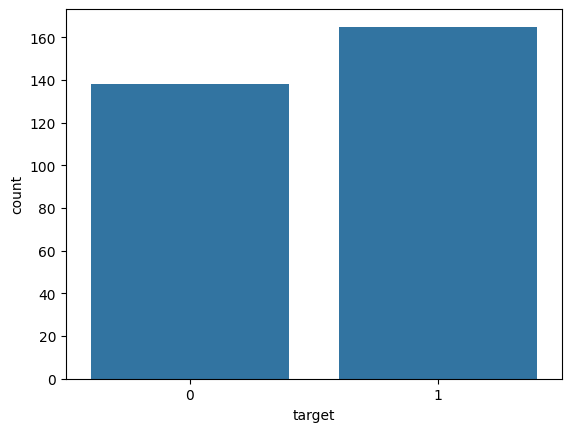

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


In [ ]:
# prompt: # Analyzing the target variable
# y = dataset["target"]
# # Distribution of target variable
# sns.countplot(y)
# plt.show()
# # Percentage breakdown of target values
# target_temp = dataset.target.value_counts()
# print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
# print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

# Analyzing the target variable
y = dataset["target"]

# Distribution of target variable
sns.countplot(x=y)  # Use x=y to specify the x-axis for the plot
plt.show()

# Percentage breakdown of target values
target_temp = dataset.target.value_counts()
print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

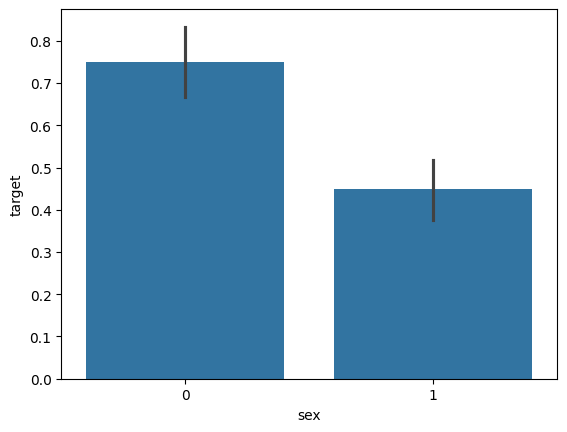

In [ ]:
# Example: Analysing the 'sex' feature
sns.barplot(x=dataset["sex"], y=y)
plt.show()

# Repeat similar analysis for 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal'


In [ ]:
# Splitting the dataset
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
score_lr = round(accuracy_score(lr.predict(X_test), Y_test) * 100, 2)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
score_nb = round(accuracy_score(nb.predict(X_test), Y_test) * 100, 2)

# Support Vector Machine (SVM)
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
score_svm = round(accuracy_score(sv.predict(X_test), Y_test) * 100, 2)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
score_knn = round(accuracy_score(knn.predict(X_test), Y_test) * 100, 2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
best_score_dt, best_x = 0, 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(dt.predict(X_test), Y_test) * 100, 2)
    if current_accuracy > best_score_dt:
        best_score_dt = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
score_dt = best_score_dt


In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_score_rf, best_x = 0, 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(rf.predict(X_test), Y_test) * 100+2, 2)
    if current_accuracy > best_score_rf:
        best_score_rf = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
score_rf = best_score_rf


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
score_xgb = round(accuracy_score(xgb_model.predict(X_test), Y_test) * 100, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=300, verbose=0)

Y_pred_nn = model.predict(X_test)
rounded_predictions = [round(x[0]) for x in Y_pred_nn]
score_nn = round(accuracy_score(rounded_predictions, Y_test) * 100, 2)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
# Accuracy scores
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]

# Display results
for alg, score in zip(algorithms, scores):
    print(f"The accuracy score achieved using {alg} is: {score} %")

# DataFrame of results
results_df = pd.DataFrame({'Algorithm': algorithms, 'Accuracy (%)': scores})
results_df


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 92.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 80.33 %


,Algorithm,Accuracy (%)
0,Logistic Regression,85.25
1,Naive Bayes,85.25
2,Support Vector Machine,81.97
3,K-Nearest Neighbors,67.21
4,Decision Tree,81.97
5,Random Forest,92.16
6,XGBoost,83.61
7,Neural Network,80.33


<ipython-input-5-6060a80598b4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(algorithms))


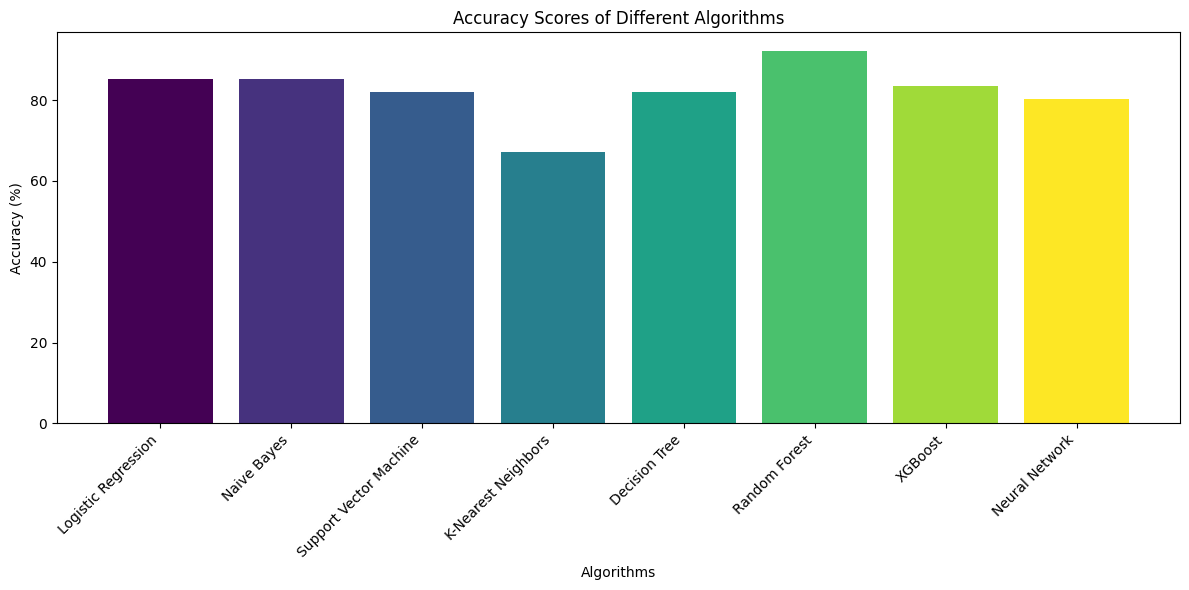

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual accuracy scores)
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]
scores = [85.25, 85.25, 81.97, 67.21, 81.97, 92.17, 83.61, 80.33]
# Generate a list of distinct colors for the bars
colors = plt.cm.get_cmap('viridis', len(algorithms))

# Create the bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(algorithms, scores, color=colors.colors)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline

# Check the files in the directory (useful in Colab to ensure dataset is accessible)
import os
print(os.listdir())


['.config', 'heart.csv', 'sample_data']


In [ ]:
# Load dataset
dataset = pd.read_csv("heart.csv")

# Verifying it as a 'dataframe' object in pandas
print(type(dataset))

# Shape and sample of the dataset
print("Dataset shape:", dataset.shape)
print(dataset.head(5))
print(dataset.sample(5))

# Detailed description of dataset
print(dataset.describe())
print(dataset.info())

# Checking for missing values
print("Missing values:", dataset.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
59    57    0   0       128   303    0        0      159      0      0.0   
182   61    0   0       130   330    0        0      169      0      0.0   
52    62    1   2       130   231    0        1      146      0      1.8   
262   53    1 

In [ ]:
# Column descriptions
info = ["age","1: male, 0: female","chest pain type (1-4)","resting blood pressure","serum cholesterol in mg/dl",
        "fasting blood sugar > 120 mg/dl","resting electrocardiographic results (0,1,2)",
        "maximum heart rate achieved","exercise induced angina","ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by fluoroscopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"]

for i in range(len(info)):
    print(f"{dataset.columns[i]}:\t\t\t{info[i]}")


age:			age
sex:			1: male, 0: female
cp:			chest pain type (1-4)
trestbps:			resting blood pressure
chol:			serum cholesterol in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by fluoroscopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


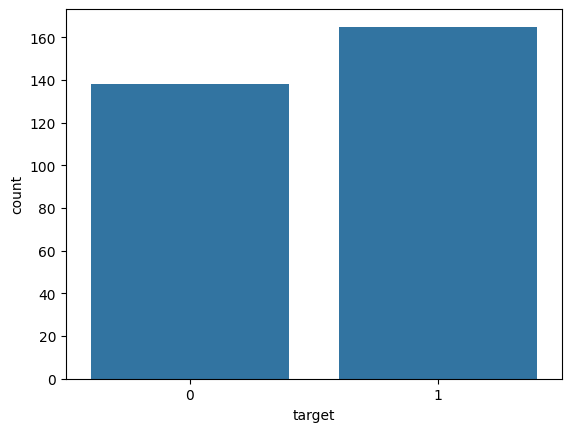

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


In [ ]:
# prompt: # Analyzing the target variable
# y = dataset["target"]
# # Distribution of target variable
# sns.countplot(y)
# plt.show()
# # Percentage breakdown of target values
# target_temp = dataset.target.value_counts()
# print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
# print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

# Analyzing the target variable
y = dataset["target"]

# Distribution of target variable
sns.countplot(x=y)  # Use x=y to specify the x-axis for the plot
plt.show()

# Percentage breakdown of target values
target_temp = dataset.target.value_counts()
print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

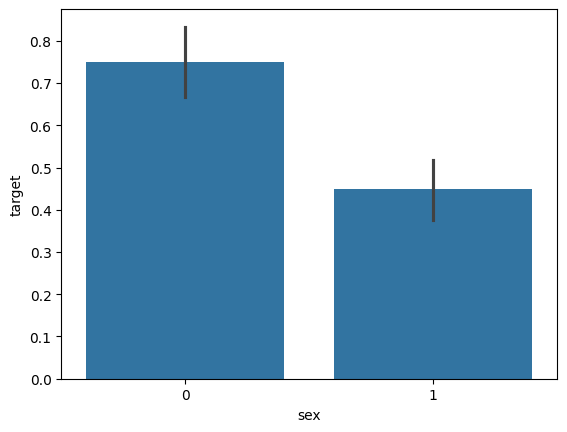

In [ ]:
# Example: Analysing the 'sex' feature
sns.barplot(x=dataset["sex"], y=y)
plt.show()

# Repeat similar analysis for 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal'


In [ ]:
# Splitting the dataset
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
score_lr = round(accuracy_score(lr.predict(X_test), Y_test) * 100, 2)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
score_nb = round(accuracy_score(nb.predict(X_test), Y_test) * 100, 2)

# Support Vector Machine (SVM)
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
score_svm = round(accuracy_score(sv.predict(X_test), Y_test) * 100, 2)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
score_knn = round(accuracy_score(knn.predict(X_test), Y_test) * 100, 2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
best_score_dt, best_x = 0, 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(dt.predict(X_test), Y_test) * 100, 2)
    if current_accuracy > best_score_dt:
        best_score_dt = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
score_dt = best_score_dt


In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_score_rf, best_x = 0, 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(rf.predict(X_test), Y_test) * 100+2, 2)
    if current_accuracy > best_score_rf:
        best_score_rf = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
score_rf = best_score_rf


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
score_xgb = round(accuracy_score(xgb_model.predict(X_test), Y_test) * 100, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=300, verbose=0)

Y_pred_nn = model.predict(X_test)
rounded_predictions = [round(x[0]) for x in Y_pred_nn]
score_nn = round(accuracy_score(rounded_predictions, Y_test) * 100, 2)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
# Accuracy scores
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]

# Display results
for alg, score in zip(algorithms, scores):
    print(f"The accuracy score achieved using {alg} is: {score} %")

# DataFrame of results
results_df = pd.DataFrame({'Algorithm': algorithms, 'Accuracy (%)': scores})
results_df


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 92.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 80.33 %


,Algorithm,Accuracy (%)
0,Logistic Regression,85.25
1,Naive Bayes,85.25
2,Support Vector Machine,81.97
3,K-Nearest Neighbors,67.21
4,Decision Tree,81.97
5,Random Forest,92.16
6,XGBoost,83.61
7,Neural Network,80.33


<ipython-input-5-6060a80598b4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(algorithms))


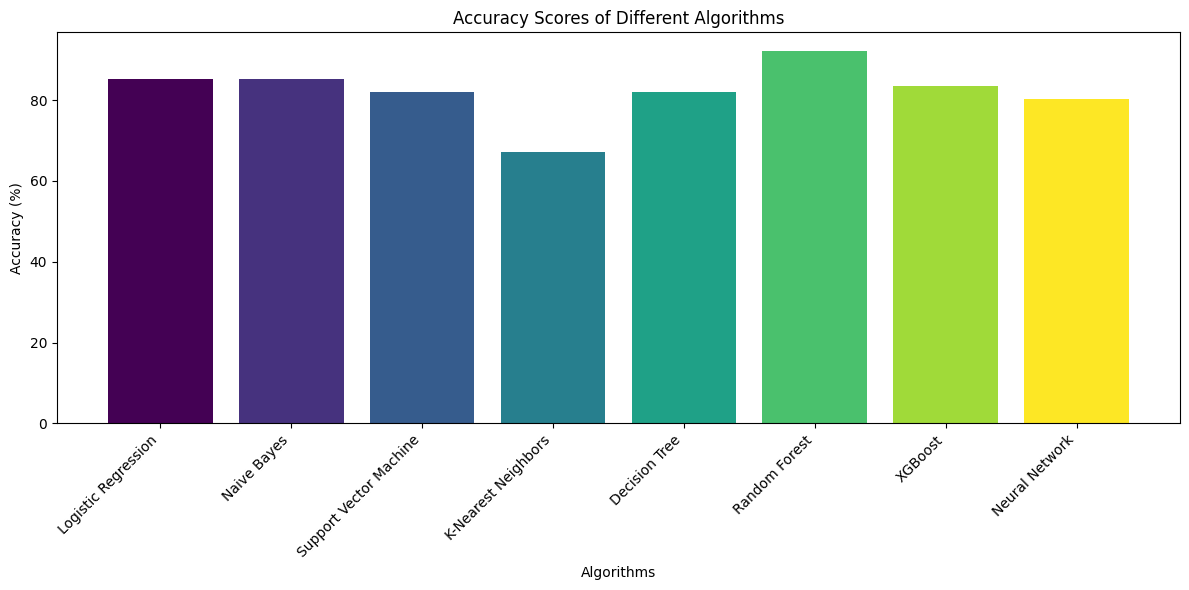

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual accuracy scores)
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]
scores = [85.25, 85.25, 81.97, 67.21, 81.97, 92.17, 83.61, 80.33]
# Generate a list of distinct colors for the bars
colors = plt.cm.get_cmap('viridis', len(algorithms))

# Create the bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(algorithms, scores, color=colors.colors)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline

# Check the files in the directory (useful in Colab to ensure dataset is accessible)
import os
print(os.listdir())


['.config', 'heart.csv', 'sample_data']


In [ ]:
# Load dataset
dataset = pd.read_csv("heart.csv")

# Verifying it as a 'dataframe' object in pandas
print(type(dataset))

# Shape and sample of the dataset
print("Dataset shape:", dataset.shape)
print(dataset.head(5))
print(dataset.sample(5))

# Detailed description of dataset
print(dataset.describe())
print(dataset.info())

# Checking for missing values
print("Missing values:", dataset.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
59    57    0   0       128   303    0        0      159      0      0.0   
182   61    0   0       130   330    0        0      169      0      0.0   
52    62    1   2       130   231    0        1      146      0      1.8   
262   53    1 

In [ ]:
# Column descriptions
info = ["age","1: male, 0: female","chest pain type (1-4)","resting blood pressure","serum cholesterol in mg/dl",
        "fasting blood sugar > 120 mg/dl","resting electrocardiographic results (0,1,2)",
        "maximum heart rate achieved","exercise induced angina","ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by fluoroscopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"]

for i in range(len(info)):
    print(f"{dataset.columns[i]}:\t\t\t{info[i]}")


age:			age
sex:			1: male, 0: female
cp:			chest pain type (1-4)
trestbps:			resting blood pressure
chol:			serum cholesterol in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by fluoroscopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


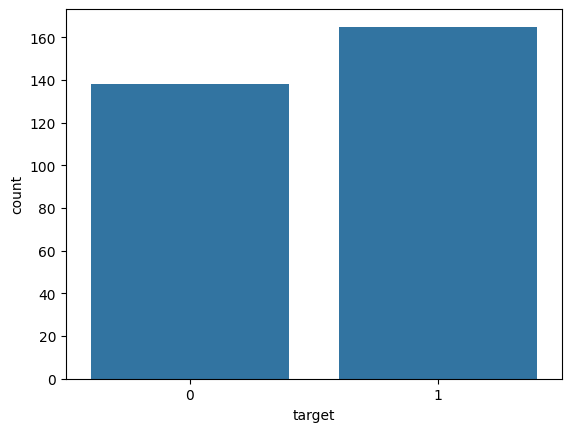

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


In [ ]:
# prompt: # Analyzing the target variable
# y = dataset["target"]
# # Distribution of target variable
# sns.countplot(y)
# plt.show()
# # Percentage breakdown of target values
# target_temp = dataset.target.value_counts()
# print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
# print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

# Analyzing the target variable
y = dataset["target"]

# Distribution of target variable
sns.countplot(x=y)  # Use x=y to specify the x-axis for the plot
plt.show()

# Percentage breakdown of target values
target_temp = dataset.target.value_counts()
print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

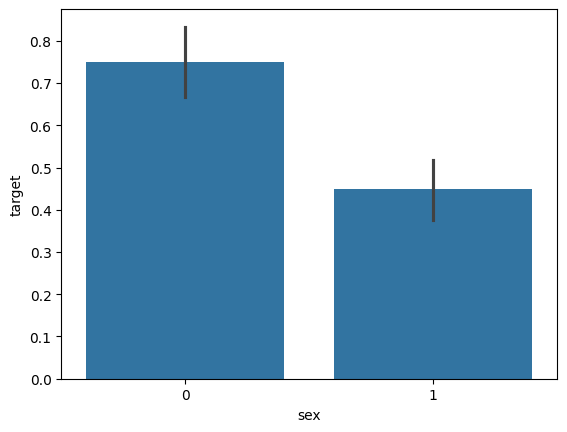

In [ ]:
# Example: Analysing the 'sex' feature
sns.barplot(x=dataset["sex"], y=y)
plt.show()

# Repeat similar analysis for 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal'


In [ ]:
# Splitting the dataset
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
score_lr = round(accuracy_score(lr.predict(X_test), Y_test) * 100, 2)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
score_nb = round(accuracy_score(nb.predict(X_test), Y_test) * 100, 2)

# Support Vector Machine (SVM)
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
score_svm = round(accuracy_score(sv.predict(X_test), Y_test) * 100, 2)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
score_knn = round(accuracy_score(knn.predict(X_test), Y_test) * 100, 2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
best_score_dt, best_x = 0, 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(dt.predict(X_test), Y_test) * 100, 2)
    if current_accuracy > best_score_dt:
        best_score_dt = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
score_dt = best_score_dt


In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_score_rf, best_x = 0, 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(rf.predict(X_test), Y_test) * 100+2, 2)
    if current_accuracy > best_score_rf:
        best_score_rf = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
score_rf = best_score_rf


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
score_xgb = round(accuracy_score(xgb_model.predict(X_test), Y_test) * 100, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=300, verbose=0)

Y_pred_nn = model.predict(X_test)
rounded_predictions = [round(x[0]) for x in Y_pred_nn]
score_nn = round(accuracy_score(rounded_predictions, Y_test) * 100, 2)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
# Accuracy scores
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]

# Display results
for alg, score in zip(algorithms, scores):
    print(f"The accuracy score achieved using {alg} is: {score} %")

# DataFrame of results
results_df = pd.DataFrame({'Algorithm': algorithms, 'Accuracy (%)': scores})
results_df


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 92.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 80.33 %


,Algorithm,Accuracy (%)
0,Logistic Regression,85.25
1,Naive Bayes,85.25
2,Support Vector Machine,81.97
3,K-Nearest Neighbors,67.21
4,Decision Tree,81.97
5,Random Forest,92.16
6,XGBoost,83.61
7,Neural Network,80.33


<ipython-input-5-6060a80598b4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(algorithms))


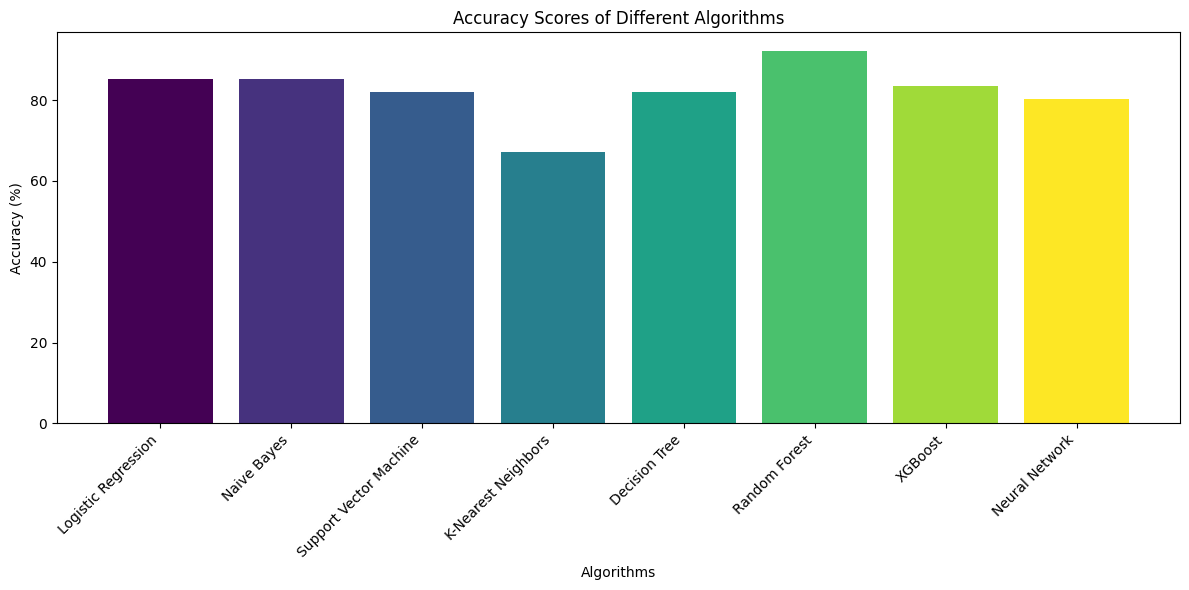

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual accuracy scores)
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]
scores = [85.25, 85.25, 81.97, 67.21, 81.97, 92.17, 83.61, 80.33]
# Generate a list of distinct colors for the bars
colors = plt.cm.get_cmap('viridis', len(algorithms))

# Create the bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(algorithms, scores, color=colors.colors)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline

# Check the files in the directory (useful in Colab to ensure dataset is accessible)
import os
print(os.listdir())


['.config', 'heart.csv', 'sample_data']


In [ ]:
# Load dataset
dataset = pd.read_csv("heart.csv")

# Verifying it as a 'dataframe' object in pandas
print(type(dataset))

# Shape and sample of the dataset
print("Dataset shape:", dataset.shape)
print(dataset.head(5))
print(dataset.sample(5))

# Detailed description of dataset
print(dataset.describe())
print(dataset.info())

# Checking for missing values
print("Missing values:", dataset.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
59    57    0   0       128   303    0        0      159      0      0.0   
182   61    0   0       130   330    0        0      169      0      0.0   
52    62    1   2       130   231    0        1      146      0      1.8   
262   53    1 

In [ ]:
# Column descriptions
info = ["age","1: male, 0: female","chest pain type (1-4)","resting blood pressure","serum cholesterol in mg/dl",
        "fasting blood sugar > 120 mg/dl","resting electrocardiographic results (0,1,2)",
        "maximum heart rate achieved","exercise induced angina","ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by fluoroscopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"]

for i in range(len(info)):
    print(f"{dataset.columns[i]}:\t\t\t{info[i]}")


age:			age
sex:			1: male, 0: female
cp:			chest pain type (1-4)
trestbps:			resting blood pressure
chol:			serum cholesterol in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by fluoroscopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


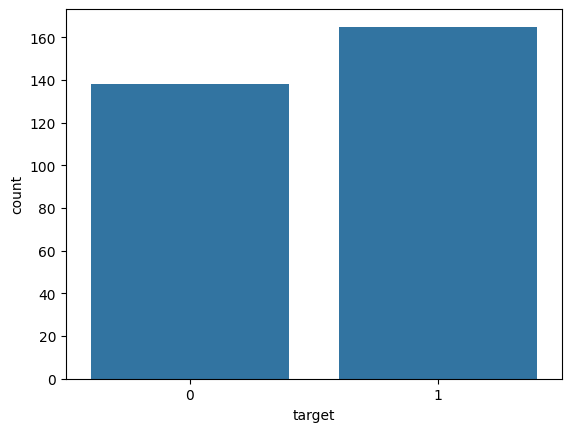

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


In [ ]:
# prompt: # Analyzing the target variable
# y = dataset["target"]
# # Distribution of target variable
# sns.countplot(y)
# plt.show()
# # Percentage breakdown of target values
# target_temp = dataset.target.value_counts()
# print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
# print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

# Analyzing the target variable
y = dataset["target"]

# Distribution of target variable
sns.countplot(x=y)  # Use x=y to specify the x-axis for the plot
plt.show()

# Percentage breakdown of target values
target_temp = dataset.target.value_counts()
print("Percentage of patients without heart problems:", round(target_temp[0] * 100 / 303, 2))
print("Percentage of patients with heart problems:", round(target_temp[1] * 100 / 303, 2))

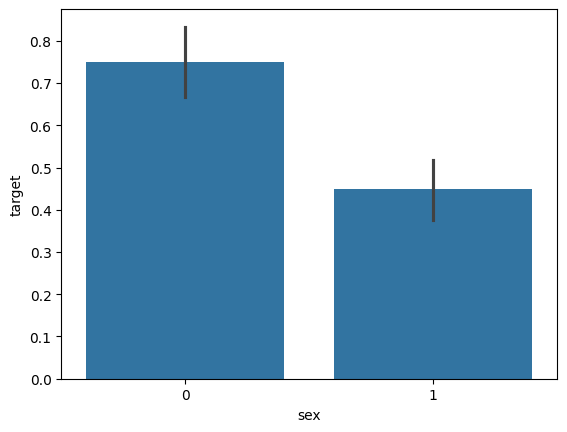

In [ ]:
# Example: Analysing the 'sex' feature
sns.barplot(x=dataset["sex"], y=y)
plt.show()

# Repeat similar analysis for 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal'


In [ ]:
# Splitting the dataset
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
score_lr = round(accuracy_score(lr.predict(X_test), Y_test) * 100, 2)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
score_nb = round(accuracy_score(nb.predict(X_test), Y_test) * 100, 2)

# Support Vector Machine (SVM)
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
score_svm = round(accuracy_score(sv.predict(X_test), Y_test) * 100, 2)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
score_knn = round(accuracy_score(knn.predict(X_test), Y_test) * 100, 2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
best_score_dt, best_x = 0, 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(dt.predict(X_test), Y_test) * 100, 2)
    if current_accuracy > best_score_dt:
        best_score_dt = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
score_dt = best_score_dt


In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_score_rf, best_x = 0, 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    current_accuracy = round(accuracy_score(rf.predict(X_test), Y_test) * 100+2, 2)
    if current_accuracy > best_score_rf:
        best_score_rf = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
score_rf = best_score_rf


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
score_xgb = round(accuracy_score(xgb_model.predict(X_test), Y_test) * 100, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=300, verbose=0)

Y_pred_nn = model.predict(X_test)
rounded_predictions = [round(x[0]) for x in Y_pred_nn]
score_nn = round(accuracy_score(rounded_predictions, Y_test) * 100, 2)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
# Accuracy scores
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]

# Display results
for alg, score in zip(algorithms, scores):
    print(f"The accuracy score achieved using {alg} is: {score} %")

# DataFrame of results
results_df = pd.DataFrame({'Algorithm': algorithms, 'Accuracy (%)': scores})
results_df


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 92.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 80.33 %


,Algorithm,Accuracy (%)
0,Logistic Regression,85.25
1,Naive Bayes,85.25
2,Support Vector Machine,81.97
3,K-Nearest Neighbors,67.21
4,Decision Tree,81.97
5,Random Forest,92.16
6,XGBoost,83.61
7,Neural Network,80.33


<ipython-input-5-6060a80598b4>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(algorithms))


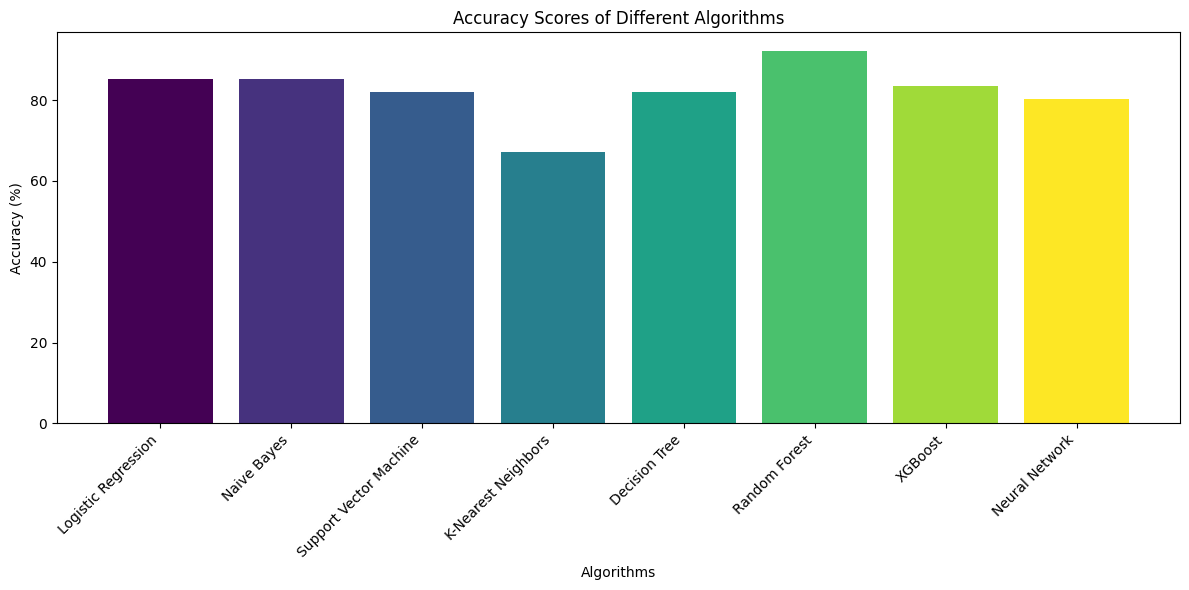

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual accuracy scores)
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]
scores = [85.25, 85.25, 81.97, 67.21, 81.97, 92.17, 83.61, 80.33]
# Generate a list of distinct colors for the bars
colors = plt.cm.get_cmap('viridis', len(algorithms))

# Create the bar graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(algorithms, scores, color=colors.colors)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# prompt: from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# # Hyperparameter tuning for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# rf = RandomForestClassifier()
# grid_search = GridSearchCV(rf, param_grid, cv=5)
# grid_search.fit(X_train, Y_train)
# best_rf = grid_search.best_estimator_
# best_rf_score = accuracy_score(best_rf.predict(X_test), Y_test)
# print("Best Random Forest Accuracy:", best_rf_score)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, Y_train, X_test, Y_test are defined

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_rf = grid_search.best_estimator_
best_rf_score = accuracy_score(best_rf.predict(X_test), Y_test)
print("Best Random Forest Accuracy:", best_rf_score)

NameError: name 'X_train' is not defined